# Binary Search Tree. Assignment 2

Last Updated: October 5, 2023

**INSTRUCTIONS**

Below is code for a Binary Search Tree Class. Seven of the methods in this implementation are incomplete (vacuous): `find`, `size`, `preorder`, `inorder`, `postorder`, \_\_str\_\_ and `height`. It is your task to complete them. Use the testing code to test and confirm your implementation. Submit the completed notebook file (BOTH the .ipynb and a rendered .html).

**Note:** Finding the height of a binary tree is a common tech interview question.

**POINT VALUES: (TOTAL=100)**  

| method| points |
| :----| ---- |
| find | 20   |
| size | 10   |
| inorder | 20   |
| preorder | 10   |
| postorder | 10   |
| str | 20   |
| height | 10  |

---

**ABOUT THE CLASSES**

The `Node` class describes the structure of a node in the tree: each node has a data item and can have a left and right child. 

The `BinarySearchTree` class is responsible for tree-level methods such as `buildBST`, inserting a data value in the right place/node in the BST tree (we populate the tree given a list data values through main), and the tree traversal methods.

---

In [9]:
# -*- coding: utf-8 -*-
"""
Binary Search Tree
Plus tree traversal methods 

NOTE: I placed return statements immediately after the function declarations so 
you can run the code and see the print statments before beginning the assignment. 
HOWEVER ... You will need to move the return statements to the end of the functions
once you complete each function implementation :)
"""
import matplotlib.pyplot as plt
import networkx as nx

class Node:

      def __init__(self, data): # Constructor of Node class
            # A node has a data value, a left child node and a right child node
          self.data = data  #data item
          self.left = None  #left child, initially empty
          self.right = None #right child, initially empty

      def __str__(self): # Printing a node
          return str(self.data) #return as string

# ===================================================================
# ===================================================================

class BinarySearchTree:

      def __init__(self): # Constructor of BinarySearchTree class
          self.root = None  # Initially, an empty root node
          self.edgeList = []  # used for networkx graph later on the HW

# ===================================================================
      def buildBST(self, val):  # Build ("create") a binary search tree 
          if self.root == None:
             self.root = Node(val)
          else:
             current = self.root
             while 1:
                 if val < current.data:
                   if current.left:
                      current = current.left  # Go left...
                   else:
                      current.left = Node(val)  # Left child is empty; place value here
                      self.edgeList.append((current.data, val))
                      break;      
                 elif val > current.data:
                    if current.right:
                       current = current.right  # Go right...
                    else:
                       current.right = Node(val)  # Right child is empty; place value here
                       self.edgeList.append((current.data, val))
                       break;      
                 else:             
                    break 

# ===================================================================
      def find(self, target):  # Find a node with the 'target' value in the BST
          '''

          returns true if found, false otherwise
          '''
          ## TODO:  Complete this method! ##
          current = self.root
          while current:
              if target == current.data:
                  return True
              elif target < current.data:
                  current = current.left
              else:
                  current = current.right
          return False

# ===================================================================
      def size(self, node):  # Counts the number of nodes in the BST
          '''
          returns number of nodes
          '''
          ## TODO:  Complete this method! ##
          if node is None:
              return 0
          return 1 + self.size(node.left) + self.size(node.right)

# ===================================================================
      def inorder(self, node):  # Performing in-order tree traversal
          '''
          prints values as encountered inorder
          '''       
          ## TODO:  Complete this method! ##
          if node is None:
              return []
          return self.inorder(node.left) + [node.data] + self.inorder(node.right)

# ===================================================================
      def preorder(self, node):  # Performing pre-order tree traversal
          '''
          prints values as encountered preorder
          '''             
          ## TODO:  Complete this method! ##
          if node is None:
              return []
          return [node.data] + self.preorder(node.left) + self.preorder(node.right)

# ===================================================================
      def postorder(self, node):  # Performing post-order tree traversal
          '''
          prints values as encountered postorder
          '''            
          ## TODO:  Complete this method! ##
          if node is None:
              return []
          return self.postorder(node.left) + self.postorder(node.right) + [node.data]

# ===================================================================
      def __str__(self):  
          '''
          Builds networkx visualization of the BST
          '''
          ## TODO:  Complete this method! ##
          if self.root is None:
              return "Empty Tree"

          G = nx.DiGraph()
          G.add_edges_from(self.edgeList)
          pos = nx.spring_layout(G, seed=12)
          plt.figure(figsize=(8, 6))
          nx.draw(G, pos, with_labels=True, arrows=True)
          plt.title("Binary Search Tree Visualization")
          plt.show()

          return "See Graph Diagram in Figure\n"  #moved this from up top down here 

# ===================================================================            
      def height(self, node):  # Performing post-order tree traversal
          '''
          prints tree height
          '''     
          ## TODO:  Complete this method! ##
          if node is None:
              return -1 
          left_height = self.height(node.left)
          right_height = self.height(node.right)
          return 1 + max(left_height, right_height)

# ===================================================================


What's the size of the tree?
9
What's the size of the tree?
0

In-order Tree Traversal:

Pre-order Tree Traversal:

Post-order Tree Traversal:

Find 7: True
Find 5: False
Find 30: False


Display Figure of Tree:


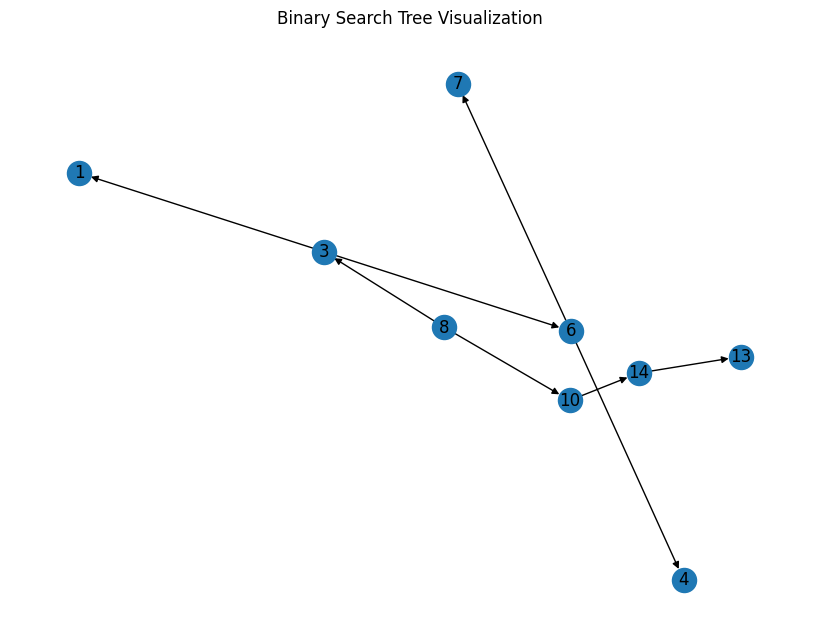

See Graph Diagram in Figure


Height of the Tree:
3


In [10]:
##################                  
## Testing Code ##
##################                        
                        
tree = BinarySearchTree()    
treeEmpty = BinarySearchTree()  # Empty tree

arr = [8,3,1,6,4,7,10,14,13]    # Array of nodes (data items)
for i in arr:                   # For each data item, build the Binary Search Tree
    tree.buildBST(i)

print('What\'s the size of the tree?')
print(tree.size(tree.root))     # size method

print('What\'s the size of the tree?')
print(treeEmpty.size(treeEmpty.root))

print("") 
print ('In-order Tree Traversal:')
tree.inorder(tree.root)         # Perform in-order tree traversal, and print
 
print("") 
print ('Pre-order Tree Traversal:')
tree.preorder(tree.root)        # Perform pre-order tree traversal, and print

print("")
print ('Post-order Tree Traversal:')
tree.postorder(tree.root)       # Perform post-order tree traversal, and print

print("")
print ('Find 7:', end=" ")      # find method
print(tree.find(7))

print('Find 5:', end=" ")
print(tree.find(5))

print('Find 30:', end=" ")
print(tree.find(30))

print("")
print("")
print ('Display Figure of Tree:')
print(tree) 

print("")
print('Height of the Tree:')
print(tree.height(tree.root))